In [1]:
from modules import computenlttcepstro
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib notebook

/Users/enricodrigo/opt/anaconda3/lib/python3.9/site-packages/sportran/plotter/style.py:39: UserWarning: The plot style api_style.mplstyle could not be loaded.
  warn('The plot style {} could not be loaded.'.format(plot_style_filename))


In [11]:
root='tip4p/'
if os.path.exists(root + 'enk.npy'):
    enka = np.load(root + 'enk.npy')
else:
    with open(root + 'enk.pkl', 'rb') as f:
        enk = pk.load(f)
    print(root + 'enk.pkl' + 'loaded correctly')
    np.save(root + 'enk.npy', np.array(enk))
    enk=0 #mi serve per deallocare la memoria dalla ram, trova un modo piu' bello magari...
    enka=np.load(root + 'enk.npy')
j, jf, kk, dk, sdk=computenlttcepstro.computenlttcepstro_k(root=root,
                                     Np=10125,
                                     L=[46.595655, 46.595655, 46.595655],
                                     nk=500,
                                     cp=68.296,
                                     deltat=0.0005,
                                     tdump=600,
                                     kv=None,
                                     nuk=5,
                                     plot=True,
                                     kalone=enka)

START CALCULATION OF D(K)
find k from number
leggo file con i dati della densita` di energia
c_enk[1] c_enk[2] 
 #####################################
  all_ckeys =  [('enk', array([0, 1]))]
 #####################################
Data length =  113336
  ckey =  [('enk', array([0, 1]))]
    step =    100000 -  88.23% completed
  ( 113336 ) steps read.
DONE.  Elapsed time:  0.6612701416015625 seconds
calcolo l` oggetto corrente con sportran
Using single component code.
la frequenza di Nynquist e`   500.0
resalmplo il periodogramma fino a fstar:  125.0
Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     500.00000 THz
 Resampling freq          f* =     125.00000 THz
 Sampling time         TSKIP =             4 steps
                             =         4.000 fs
 Original  n. of frequencies =         56669
 Resampled n. of frequencies =         141

<IPython.core.display.Javascript object>


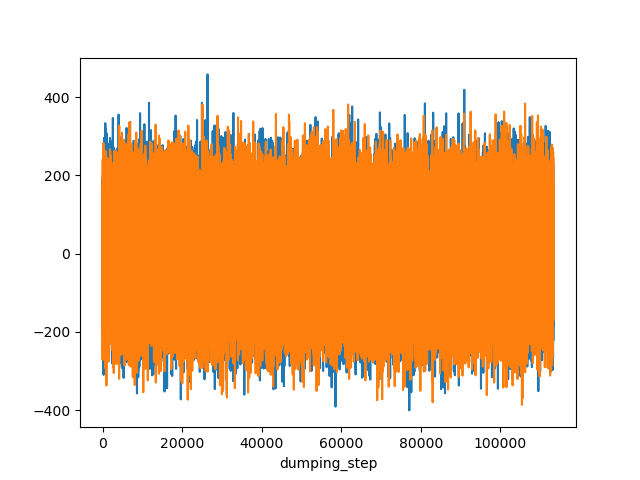

Text(0.5, 0, 'dumping_step')

In [12]:
f = plt.figure()
ax = plt.plot(j.timeseries(), j.traj);
plt.xlabel('dumping_step')

<IPython.core.display.Javascript object>


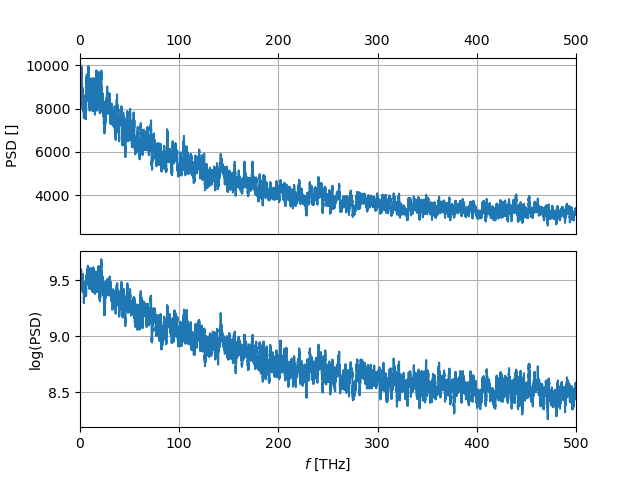

<IPython.core.display.Javascript object>


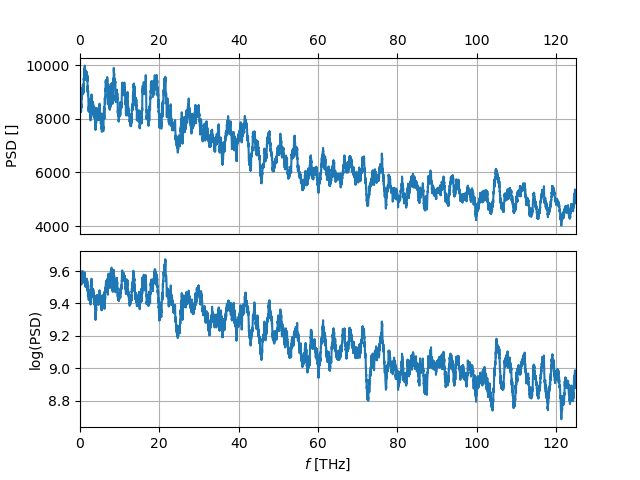

In [13]:
ax = j.plot_periodogram(PSD_FILTER_W=1, kappa_units=True)
ax = jf.plot_periodogram(PSD_FILTER_W=1, kappa_units=True)
#in x non sono Thz, sono in unita' arbitrarie....

<IPython.core.display.Javascript object>


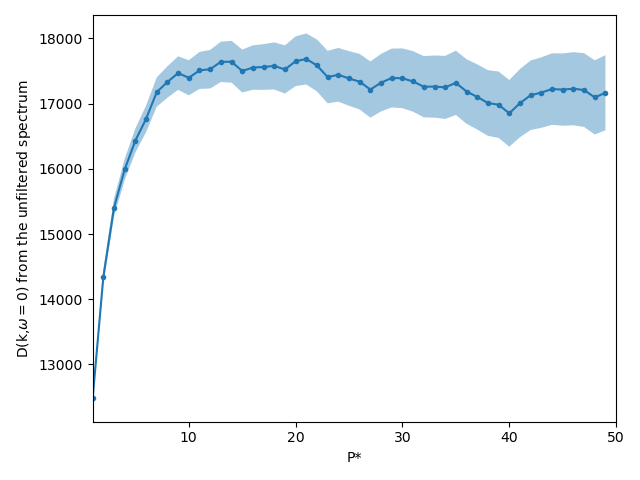

In [14]:
f = plt.figure()
ax=plt.fill_between(range(len(j.dct.tau))[1:50],(j.dct.tau+j.dct.tau_THEORY_std)[1:50],
                 (j.dct.tau-j.dct.tau_THEORY_std)[1:50], alpha=0.4)
ax=plt.plot(range(len(j.dct.tau))[1:50],(j.dct.tau)[1:50],marker='.')
plt.xlim(1,50)
plt.ylabel(r'D(k,$\omega=0$) from the unfiltered spectrum')
plt.xlabel('P*')
plt.tight_layout()

<IPython.core.display.Javascript object>


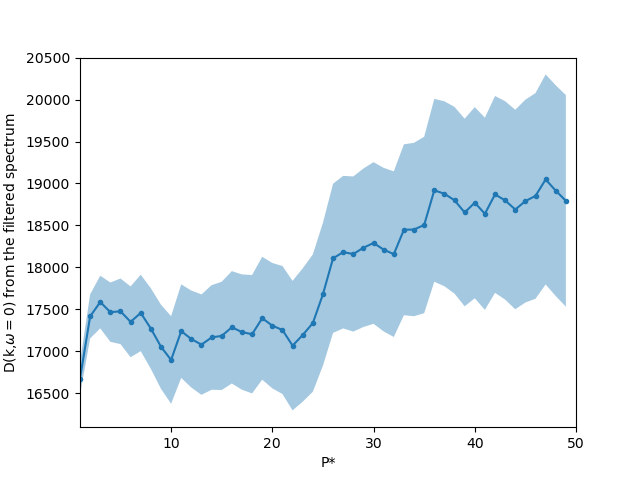

(1.0, 50.0)

In [16]:
f = plt.figure()
ax=plt.fill_between(range(len(jf.dct.tau))[1:50],(jf.dct.tau+jf.dct.tau_THEORY_std)[1:50],
                 (jf.dct.tau-jf.dct.tau_THEORY_std)[1:50], alpha=0.4)
ax=plt.plot(range(len(jf.dct.tau))[1:50],(jf.dct.tau)[1:50],marker='.')
plt.ylabel(r'D(k,$\omega=0$) from the filtered spectrum')
plt.xlabel('P*')
plt.xlim(1,50)

<IPython.core.display.Javascript object>


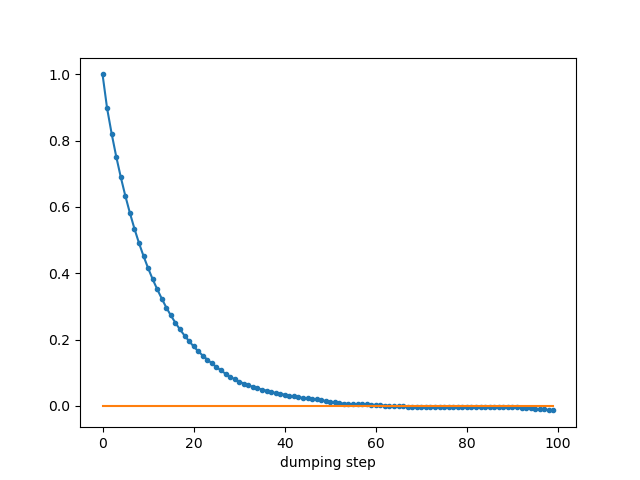

Text(0.5, 0, 'dumping step')

In [7]:
j.compute_acf()
f = plt.figure()
ax=plt.plot(j.acfm[:100]/j.acfm[0], marker='.')
ax=plt.plot(np.zeros(100))
plt.xlabel('dumping step')

In [9]:
#calcolo della d(k) per tutti i k calcolati alla lettura del file .lammpstrj
#can take some time, approx 1,7s per cycle

True

In [ ]:
kk, dk, sdk=computenlttcepstro.computenlttcepstro(root=root,
                                     Np=10125,
                                     L=[46.595655, 46.595655, 46.595655],
                                     nk=500,
                                     nkk=500,
                                     cp=68.296,
                                     deltat=0.0005,
                                     tdump=600,
                                     nskip=1)

In [ ]:
f = plt.figure()
ax = plt.errorbar(kk, dk, sdk, fmt='.')